In [2]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/bin/imports.ipynb")
execute_notebook("/cellar/users/ramarty/Projects/kir/KIR_development/data_gathering/alternate/sample_mapping.ipynb")

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [6]:
df = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/data_frames/all_the_good_stuff.csv', index_col=0)

In [7]:
print len(df)
df.head()

3501


,KIR3DL3,KIR3DP1,KIR2DL4,KIR3DL2,KIR2DP1,KIR2DL1,KIR2DS4,KIR2DL5,KIR2DS3,KIR2DS2,...,C2,A1_,A2_,B1_,B2_,C1_,C2_,activating,inhibitory,ratio
TCGA-02-0047,2,2,2,2,1,1,2,0,0,1,...,C*03,A*02:01,A*32:01,B*15:01,B*15:01,C*03:03,C*03:03,5,11,0.454545
TCGA-02-0055,2,2,2,2,1,1,2,0,0,1,...,C*15,A*11:01,A*31:01,B*51:01,B*55:01,C*03:03,C*15:02,5,11,0.454545
TCGA-02-2483,3,3,2,3,3,3,0,1,0,0,...,C*12,A*03:01,A*11:01,B*07:02,B*52:01,C*07:02,C*12:02,11,14,0.785714
TCGA-02-2485,2,2,2,2,2,2,2,0,0,0,...,C*16,A*03:01,A*29:02,B*44:04,B*49:01,C*07:01,C*16:01,4,12,0.333333
TCGA-02-2486,3,3,2,3,0,0,3,0,0,3,...,C*07,A*03:01,A*03:01,B*07:02,B*07:02,C*07:02,C*07:02,8,14,0.571429


Activating/inhibitory

In [8]:
bad_ages = df.age_at_diagnosis < 10

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


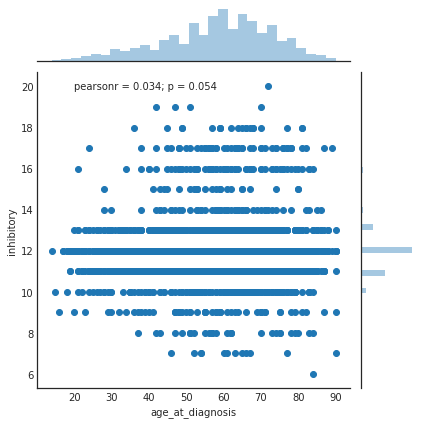

In [9]:
sns.jointplot(df[~bad_ages].age_at_diagnosis, df[~bad_ages].inhibitory)

In [10]:
print sp.spearmanr(df[~bad_ages].age_at_diagnosis, df[~bad_ages].inhibitory)
print sp.spearmanr(df[~bad_ages].age_at_diagnosis, df[~bad_ages].activating)

SpearmanrResult(correlation=0.014366318852098875, pvalue=0.4151774859048257)
SpearmanrResult(correlation=-0.0036187518839580148, pvalue=0.8373883098287653)


In [11]:
for tissue in df.tissue.unique():
    t = df.tissue == tissue
    print tissue, sp.spearmanr(df[~bad_ages&t].age_at_diagnosis, df[~bad_ages&t].inhibitory)

GBM SpearmanrResult(correlation=-0.038722645388269895, pvalue=0.6605760412830624)
OV SpearmanrResult(correlation=0.08150651917425619, pvalue=0.3491570096416766)
LUAD SpearmanrResult(correlation=0.06837161000811148, pvalue=0.19746012106893554)
PRAD SpearmanrResult(correlation=-0.0713295285300802, pvalue=0.22833449497886993)
LUSC SpearmanrResult(correlation=-0.026110848154821314, pvalue=0.696871057079248)
PAAD SpearmanrResult(correlation=-0.12157855290334232, pvalue=0.21890534160402003)
KIRC SpearmanrResult(correlation=0.01945656227511721, pvalue=0.8274391483565388)
KIRP SpearmanrResult(correlation=-0.15509454783881355, pvalue=0.19012787588408092)
STAD SpearmanrResult(correlation=-0.12349258030949518, pvalue=0.06150922940866808)
HNSC SpearmanrResult(correlation=0.03606366389044521, pvalue=0.4681113584889871)
SKCM SpearmanrResult(correlation=0.1096448388097787, pvalue=0.3734233118800434)
CESC SpearmanrResult(correlation=-0.0354898390972864, pvalue=0.8348132934977193)
THCA SpearmanrResult(

In [12]:
for tissue in df.tissue.unique():
    t = df.tissue == tissue
    print tissue, sp.spearmanr(df[~bad_ages&t].age_at_diagnosis, df[~bad_ages&t].activating)

GBM SpearmanrResult(correlation=0.13991672447897277, pvalue=0.11095332502072779)
OV SpearmanrResult(correlation=-0.1935194435483928, pvalue=0.02506594224138824)
LUAD SpearmanrResult(correlation=-0.04613596124045124, pvalue=0.38478201634300613)
PRAD SpearmanrResult(correlation=0.05422931681702304, pvalue=0.3599988490581818)
LUSC SpearmanrResult(correlation=-0.019654692809479183, pvalue=0.7693642191393065)
PAAD SpearmanrResult(correlation=0.07012600270973078, pvalue=0.47933296542497406)
KIRC SpearmanrResult(correlation=0.1588833778609077, pvalue=0.07324141808606406)
KIRP SpearmanrResult(correlation=0.09448192728057253, pvalue=0.42655426659897433)
STAD SpearmanrResult(correlation=-0.062035217586431456, pvalue=0.34897096888179313)
HNSC SpearmanrResult(correlation=0.016543794476811615, pvalue=0.7393194077747378)
SKCM SpearmanrResult(correlation=-0.1946454530094117, pvalue=0.11170328607585016)
CESC SpearmanrResult(correlation=-0.40140673266907906, pvalue=0.013800807367204388)
THCA SpearmanrR

Specific genes

In [13]:
genes = ['KIR3DL3', 'KIR3DP1', 'KIR2DL4', 'KIR3DL2', 'KIR2DS2', 'KIR2DS3', 'KIR2DP1', 
         'KIR2DL1', 'KIR3DS1', 'KIR2DS5', 'KIR2DS4']

In [14]:
for gene in genes:
    print gene, sp.spearmanr(df[~bad_ages][gene], df[~bad_ages].age_at_diagnosis)

KIR3DL3 SpearmanrResult(correlation=0.04244264272752428, pvalue=0.01603203387319035)
KIR3DP1 SpearmanrResult(correlation=0.006143506508553356, pvalue=0.7275192875716108)
KIR2DL4 SpearmanrResult(correlation=0.014967132286265512, pvalue=0.3959389304268769)
KIR3DL2 SpearmanrResult(correlation=0.029921360668625954, pvalue=0.0896312787515665)
KIR2DS2 SpearmanrResult(correlation=0.006692836961569105, pvalue=0.7042548937944375)
KIR2DS3 SpearmanrResult(correlation=0.0008345892223546207, pvalue=0.9622477755003994)
KIR2DP1 SpearmanrResult(correlation=0.02226416242384465, pvalue=0.2066428772405206)
KIR2DL1 SpearmanrResult(correlation=0.014108255867661705, pvalue=0.42360755229032543)
KIR3DS1 SpearmanrResult(correlation=-0.012866912794291854, pvalue=0.46553272778941646)
KIR2DS5 SpearmanrResult(correlation=0.004603962822284529, pvalue=0.794006574391139)
KIR2DS4 SpearmanrResult(correlation=0.011502061697007966, pvalue=0.5141742764863275)


In [16]:
for tissue in df.tissue.unique():
    t = df.tissue == tissue
    for gene in genes:
        if sp.spearmanr(df[~bad_ages&t][gene], df[~bad_ages&t].age_at_diagnosis)[1] < 0.05:
            print tissue, gene, sp.spearmanr(df[~bad_ages&t][gene], df[~bad_ages&t].age_at_diagnosis)

OV KIR3DS1 SpearmanrResult(correlation=-0.1711168321022543, pvalue=0.0480564631620378)
PRAD KIR3DL2 SpearmanrResult(correlation=0.17329742952981808, pvalue=0.003225903188621298)
PRAD KIR2DP1 SpearmanrResult(correlation=-0.13324991314302248, pvalue=0.02396925352056255)
KIRP KIR2DS2 SpearmanrResult(correlation=0.23329029268307977, pvalue=0.04699666177636779)
KIRP KIR2DL1 SpearmanrResult(correlation=-0.23196776404238467, pvalue=0.04829639537987043)
STAD KIR3DP1 SpearmanrResult(correlation=-0.14894338243477975, pvalue=0.02387423762082846)
STAD KIR2DL4 SpearmanrResult(correlation=-0.14894338243477975, pvalue=0.02387423762082846)
CESC KIR3DS1 SpearmanrResult(correlation=-0.3380044591853746, pvalue=0.040747274963427754)
THCA KIR3DL3 SpearmanrResult(correlation=0.1243837384235062, pvalue=0.013017371143146408)
THCA KIR2DP1 SpearmanrResult(correlation=0.10000023646787173, pvalue=0.04618226016204349)


## HLA/KIR combinations

In [17]:
# maybe need to sort these in order to make the selections work?

In [18]:
df.head()

,KIR3DL3,KIR3DP1,KIR2DL4,KIR3DL2,KIR2DP1,KIR2DL1,KIR2DS4,KIR2DL5,KIR2DS3,KIR2DS2,...,C2,A1_,A2_,B1_,B2_,C1_,C2_,activating,inhibitory,ratio
TCGA-02-0047,2,2,2,2,1,1,2,0,0,1,...,C*03,A*02:01,A*32:01,B*15:01,B*15:01,C*03:03,C*03:03,5,11,0.454545
TCGA-02-0055,2,2,2,2,1,1,2,0,0,1,...,C*15,A*11:01,A*31:01,B*51:01,B*55:01,C*03:03,C*15:02,5,11,0.454545
TCGA-02-2483,3,3,2,3,3,3,0,1,0,0,...,C*12,A*03:01,A*11:01,B*07:02,B*52:01,C*07:02,C*12:02,11,14,0.785714
TCGA-02-2485,2,2,2,2,2,2,2,0,0,0,...,C*16,A*03:01,A*29:02,B*44:04,B*49:01,C*07:01,C*16:01,4,12,0.333333
TCGA-02-2486,3,3,2,3,0,0,3,0,0,3,...,C*07,A*03:01,A*03:01,B*07:02,B*07:02,C*07:02,C*07:02,8,14,0.571429


In [19]:
hla_a = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_a.csv').readlines()[1:]]
hla_b = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_b.csv').readlines()[1:]]
hla_c = [x.split(',')[1:3] for x in open('/cellar/users/ramarty/Data/kir/biological/combinations.hla_c.csv').readlines()[1:]]

In [20]:
# try both 0 vs 1/2/3 and 0/1 vs 2/3

In [21]:
for gene in genes:
    for hla1, hla2 in hla_a:
        h = (df.A1 == hla1)&(df.A2 == hla2)
        if sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)[1] < 0.05:
            print gene, hla1, hla2, sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)

KIR3DL2 A*02 A*68 SpearmanrResult(correlation=0.2070404787909658, pvalue=0.04297143472245859)


In [22]:
for gene in genes:
    for hla1, hla2 in hla_b:
        h = (df.B1 == hla1)&(df.B2 == hla2)
        if sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)[1] < 0.05:
            print gene, hla1, hla2, sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)

KIR3DL3 B*07 B*07 SpearmanrResult(correlation=0.27804156793462514, pvalue=0.028663023282738738)
KIR3DL2 B*08 B*35 SpearmanrResult(correlation=-0.2867060763709404, pvalue=0.03059926457020235)
KIR2DS2 B*08 B*44 SpearmanrResult(correlation=0.23637076656779488, pvalue=0.02751265370380805)
KIR2DS2 B*08 B*40 SpearmanrResult(correlation=0.47030068735874714, pvalue=0.002517702630277892)
KIR2DS3 B*08 B*40 SpearmanrResult(correlation=0.4195938686895245, pvalue=0.007835544121023249)
KIR2DP1 B*07 B*07 SpearmanrResult(correlation=0.2780296372584947, pvalue=0.02867014483304514)
KIR3DS1 B*07 B*15 SpearmanrResult(correlation=-0.38201645755816055, pvalue=0.0009285232903883552)
KIR3DS1 B*40 B*44 SpearmanrResult(correlation=0.30617899601774395, pvalue=0.021734480808261694)
KIR2DS4 B*07 B*15 SpearmanrResult(correlation=0.29272470776993714, pvalue=0.012585056570648817)


In [23]:
for gene in genes:
    for hla1, hla2 in hla_c:
        h = (df.C1 == hla1)&(df.C2 == hla2)
        if sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)[1] < 0.05:
            print gene, hla1, hla2, sp.spearmanr(df[~bad_ages&h][gene], df[~bad_ages&h].age_at_diagnosis)

KIR3DL3 C*03 C*05 SpearmanrResult(correlation=0.25659056068498065, pvalue=0.018470649701166648)
KIR2DL1 C*04 C*12 SpearmanrResult(correlation=0.27873019989234354, pvalue=0.018583182342342543)
KIR3DS1 C*03 C*05 SpearmanrResult(correlation=0.23508560817151664, pvalue=0.03135200309570093)
KIR2DS5 C*04 C*05 SpearmanrResult(correlation=-0.347440570076469, pvalue=0.015537782438782208)
KIR2DS4 C*04 C*05 SpearmanrResult(correlation=0.3040398563339178, pvalue=0.035645797378579314)
